In [44]:
#######################################################
#                                                     #
#                IMPORT KNIHOVEN A DAT                #
#                                                     #
#######################################################

In [45]:
# Knihovny pro manipulaci s daty
import pandas as pd
import numpy as np

# Algoritmy pro predikci
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Algoritmus pro rozdělení dat na trénovací a testovací
from sklearn.model_selection import train_test_split

# Import metrik pro vyhodnocení přesnosti
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Knihovny pro vizualizaci
import matplotlib.pyplot as plt
%matplotlib inline

# Import pro vizualizaci stromů
from sklearn.tree import plot_tree

In [46]:
# Načtení dat do dataframů
df_availability = pd.read_csv('dostupnost.csv')
df_performance = pd.read_csv('vykon.csv')
df_quality = pd.read_csv('kvalita.csv')

# Ukázka načtených dat pro jednotlivé dataframy
# df_availability
# df_performance
# df_quality

In [47]:
#######################################################
#                                                     #
#                PREDIKCE DOSTUPNOSTI                 #
#              (Výchozí hyperparametry)               #
#                                                     #
#######################################################

In [48]:
# Úprava dataframu df_availability

# Odebrání sloupce s ID smeny
df_availability = df_availability.drop('id_smeny', axis=1)

# Enkódování typu směny ranní = 1, odpolední = 0
df_availability['typ_smeny'] = df_availability['typ_smeny'].map({'ranni': 1, 'odpoledni': 0})

# Enkódování operátora a typu údržby
df_enc_availability = pd.get_dummies(df_availability, columns=['operator_zam_cislo', 'typ_servisu'])

# Ukázka enkódovaných dat
#df_enc_availability

In [49]:
#Rozdělení (SPLIT) na vstupní a výstupní data (X, y)
X_a = df_enc_availability.drop(df_enc_availability.columns[7], axis=1)  # Drop pro 8. sloupec a vse ostatni do X
y_a = df_enc_availability.iloc[:,7:8]  # Drop pro vse krom 8. sloupce a ten do y

In [50]:
# Ukázka X datasetu (features)
#X_a

In [51]:
# Ukázka y datasetu (target)
#y_a

In [52]:
#Rozdělení (SPLIT) na trénovací a testovací data (Aktuálně 80 % dat trénink a 20 % dat test)
Xtrain_a, Xtest_a, Ytrain_a, Ytest_a = train_test_split(X_a,y_a, test_size = 0.20, random_state = 1)

In [53]:
#Vytvoření instancí s výchozími hyperparametry
modelLR = LinearRegression()
modelTR = DecisionTreeRegressor()
modelRF = RandomForestRegressor(random_state=1)
modelGR = GradientBoostingRegressor()

In [54]:
#Trénink modelů
modelLR.fit(Xtrain_a, Ytrain_a)
modelTR.fit(Xtrain_a, Ytrain_a)
modelRF.fit(Xtrain_a, np.array(Ytrain_a).ravel())
modelGR.fit(Xtrain_a, np.array(Ytrain_a).ravel())

GradientBoostingRegressor()

In [55]:
#Vytvoření predikcí jednotlivými algoritmy
YpredLR_a = modelLR.predict(Xtest_a)
YpredTR_a = modelTR.predict(Xtest_a)
YpredRF_a = modelRF.predict(Xtest_a)
YpredGR_a = modelGR.predict(Xtest_a)

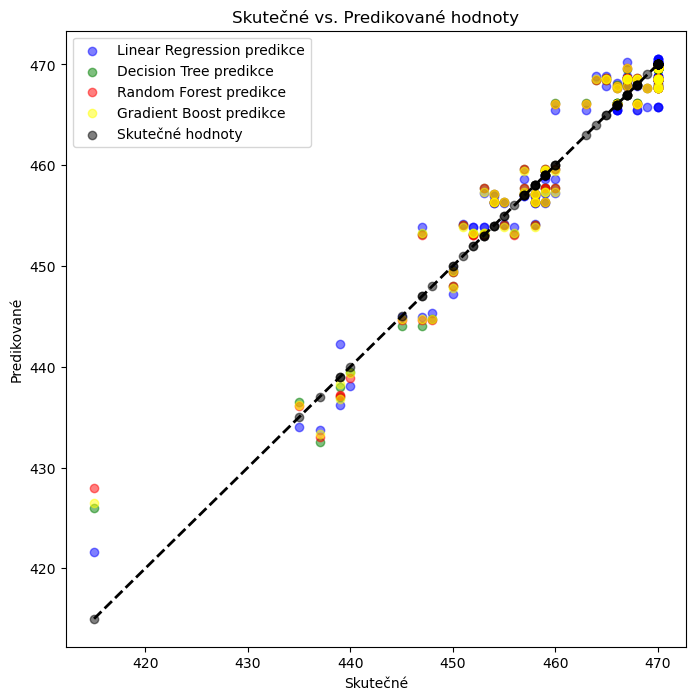

In [85]:
# Scatter plot pro všechny predikce
plt.figure(figsize=(8, 8))

plt.scatter(Ytest_a, YpredLR_a, alpha=0.5, color='blue', label='Linear Regression predikce')
plt.scatter(Ytest_a, YpredTR_a, alpha=0.5, color='green', label='Decision Tree predikce')
plt.scatter(Ytest_a, YpredRF_a, alpha=0.5, color='red', label='Random Forest predikce')
plt.scatter(Ytest_a, YpredGR_a, alpha=0.5, color='yellow', label='Gradient Boost predikce')
plt.scatter(Ytest_a, Ytest_a, alpha=0.5, color='black', label = 'Skutečné hodnoty')

plt.plot([Ytest_a.min(), Ytest_a.max()], [Ytest_a.min(), Ytest_a.max()], 'k--', lw=2)
plt.xlabel('Skutečné')
plt.ylabel('Predikované')
plt.title('Skutečné vs. Predikované hodnoty')
plt.legend()
plt.show()

In [57]:
#Výpis MAE
print("MAE všech modelů (nižší = lepší) \n")
print("Linear Regressor MAE: \n" + str(mean_absolute_error(Ytest_a, YpredLR_a)) + "\n")
print("Decision Tree Regressor MAE: \n" + str(mean_absolute_error(Ytest_a, YpredTR_a)) + "\n")
print("Random Forest Regressor MAE: \n" + str(mean_absolute_error(Ytest_a, YpredRF_a)) + "\n")
print("Gradient Boost Regressor MAE: \n" + str(mean_absolute_error(Ytest_a, YpredGR_a)) + "\n")

MAE všech modelů (nižší = lepší) 

Linear Regressor MAE: 
1.7672413793103448

Decision Tree Regressor MAE: 
1.7059797482211285

Random Forest Regressor MAE: 
1.7133604630970205

Gradient Boost Regressor MAE: 
1.6782999157690486



In [58]:
#Výpis MSE
print("MSE všech modelů (nižší = lepší) \n")
print("Linear Regressor MSE: \n" + str(mean_squared_error(Ytest_a, YpredLR_a)) + "\n")
print("Decision Tree Regressor MSE: \n" + str(mean_squared_error(Ytest_a, YpredTR_a)) + "\n")
print("Random Forest Regressor MSE: \n" + str(mean_squared_error(Ytest_a, YpredRF_a)) + "\n")
print("Gradient Boost Regressor MSE: \n" + str(mean_squared_error(Ytest_a, YpredGR_a)) + "\n")

MSE všech modelů (nižší = lepší) 

Linear Regressor MSE: 
5.329022988505747

Decision Tree Regressor MSE: 
5.64411887074943

Random Forest Regressor MSE: 
6.098851081787038

Gradient Boost Regressor MSE: 
5.646090539381132



In [59]:
#Výpis R2 score
print("R2 score všech modelů (bližší k 1 = lepší) \n")
print("Linear Regressor R2: \n" + str(r2_score(Ytest_a, YpredLR_a)) + "\n")
print("Decision Tree Regressor R2: \n" + str(r2_score(Ytest_a, YpredTR_a)) + "\n")
print("Random Forest Regressor R2: \n" + str(r2_score(Ytest_a, YpredRF_a)) + "\n")
print("Gradient Boost Regressor R2: \n" + str(r2_score(Ytest_a, YpredGR_a)) + "\n")

R2 score všech modelů (bližší k 1 = lepší) 

Linear Regressor R2: 
0.9497567582043891

Decision Tree Regressor R2: 
0.9467859625004641

Random Forest Regressor R2: 
0.9424986437028731

Gradient Boost Regressor R2: 
0.9467673731597881



In [60]:
#Výpis MAPE
print("MAPE všech modelů (nižší = lepší) \n")
print("Linear Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_a, YpredLR_a)) + "\n")
print("Decision Tree Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_a, YpredTR_a)) + "\n")
print("Random Forest Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_a, YpredRF_a)) + "\n")
print("Gradient Boost Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_a, YpredGR_a)) + "\n")

MAPE všech modelů (nižší = lepší) 

Linear Regressor MAPE: 
0.003867105202368025

Decision Tree Regressor MAPE: 
0.0037473544191002025

Random Forest Regressor MAPE: 
0.003767874953854891

Gradient Boost Regressor MAPE: 
0.0036866407872014465



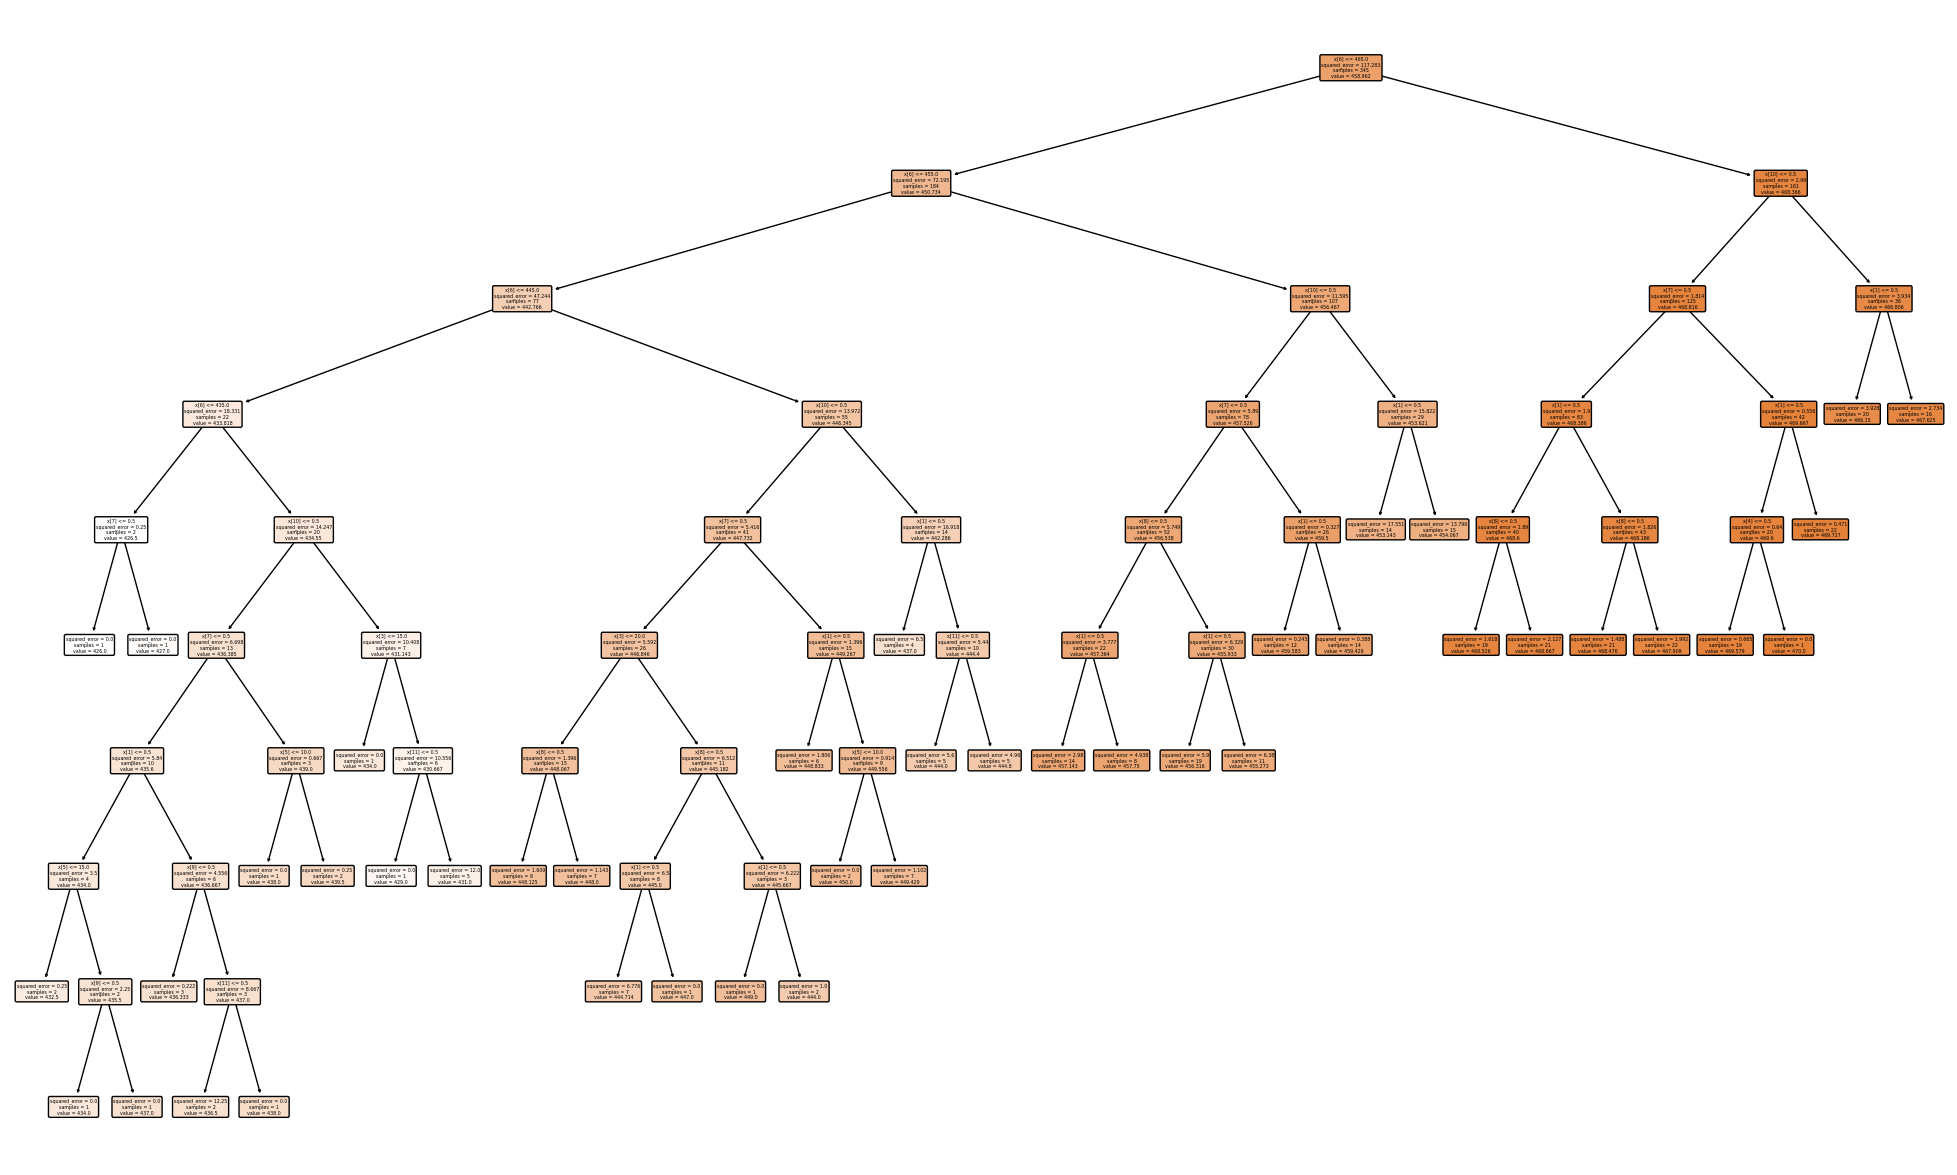

In [61]:
# Visualizace stromu
plt.figure(figsize=(25,15))
plot_tree(modelTR, filled=True, rounded=True)
plt.show()


In [62]:
#######################################################
#                                                     #
#                PREDIKCE DOSTUPNOSTI                 #
#             (Upravene hyperparametry)               #
#                                                     #
#######################################################

#Zatím není

In [63]:
#param_grid = {
#    'n_estimators': [10, 100, 200, 300, 400],
#    'max_depth': [1, 2, 3, 4, 5, 10, 20, 30],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4]
#}

In [64]:
#from sklearn.model_selection import GridSearchCV

In [65]:
#rfr_cv = GridSearchCV(estimator=modelRF, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [66]:
#rfr_cv.fit(Xtrain, np.array(Ytrain).ravel())

In [67]:
#y_pred = rfr_cv.predict(Xtest)

In [68]:
#######################################################
#                                                     #
#                 PREDIKCE VÝKONU                     #
#              (Výchozí hyperparametry)               #
#                                                     #
#######################################################

In [69]:
# Úprava df_performance

# Opětovný import kvůli debugování
df_performance = pd.read_csv('vykon.csv')

# Odebrání sloupce s ID smeny
df_performance = df_performance.drop('id_smeny', axis=1)

# Enkódování typu směny ranní = 1, odpolední = 0
df_performance['typ_smeny'] = df_performance['typ_smeny'].map({'ranni': 1, 'odpoledni': 0})

# Enkódování operátora a typu údržby
df_enc_performance = pd.get_dummies(df_performance, columns=['operator_zam_cislo'])

# Ukázka enkódovaných dat
df_enc_performance

,planovana_delka_smeny(min),typ_smeny,planovany_pocet_serizeni,provozni_doba_od_udrzby_vykonu(min),naplanovana_udrzba_vykonu,index_složitosti_vyrobku_na_smenu,planovany_potencial_vyroby_ks,planovany_cycle_time_na_smenu(min),skutecny_cycle_time(min),operator_zam_cislo_661,operator_zam_cislo_688,operator_zam_cislo_736,operator_zam_cislo_968
0,480,1,1,4571,1,13,60,7.5,9.040,False,False,True,False
1,480,0,3,447,0,35,60,7.5,9.000,False,False,False,True
2,480,1,1,887,0,19,67,7.0,8.080,False,False,True,False
3,480,0,1,1356,0,13,59,8.0,9.090,False,False,False,True
4,480,1,1,1821,0,18,94,5.0,5.610,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,480,0,1,3179,0,19,63,7.5,8.925,False,False,False,True
428,480,1,2,3649,0,28,61,7.5,9.450,False,False,True,False
429,480,0,1,4104,0,13,85,5.5,6.480,False,False,False,True
430,480,1,1,4574,1,17,60,7.5,9.040,True,False,False,False


In [70]:
#Rozdělení (SPLIT) na vstupní a výstupní data (X, y)
X_p = df_enc_performance.drop(df_enc_performance.columns[8], axis=1)  # Drop pro 9. sloupec a vse ostatni do X
y_p = df_enc_performance.iloc[:,8:9]  # Drop pro vse krom 9. sloupce a ten do y

In [71]:
# Ukázka X datasetu (features)
#X_p

In [72]:
# Ukázka y datasetu (target)
#y_p

In [73]:
#Rozdělení (SPLIT) na trénovací a testovací data (Aktuálně 80 % dat trénink a 20 % dat test)
Xtrain_p, Xtest_p, Ytrain_p, Ytest_p = train_test_split(X_p,y_p, test_size = 0.20, random_state = 1)

In [74]:
#Vytvoření instancí s výchozími hyperparametry
modelLR_p = LinearRegression()
modelTR_p = DecisionTreeRegressor()
modelRF_p = RandomForestRegressor(random_state=1)
modelGR_p = GradientBoostingRegressor()

In [75]:
#Trénink modelů
modelLR_p.fit(Xtrain_p, Ytrain_p)
modelTR_p.fit(Xtrain_p, Ytrain_p)
modelRF_p.fit(Xtrain_p, np.array(Ytrain_p).ravel())
modelGR_p.fit(Xtrain_p, np.array(Ytrain_p).ravel())

GradientBoostingRegressor()

In [76]:
#Vytvoření predikcí jednotlivými algoritmy
YpredLR_p = modelLR_p.predict(Xtest_p)
YpredTR_p = modelTR_p.predict(Xtest_p)
YpredRF_p = modelRF_p.predict(Xtest_p)
YpredGR_p = modelGR_p.predict(Xtest_p)

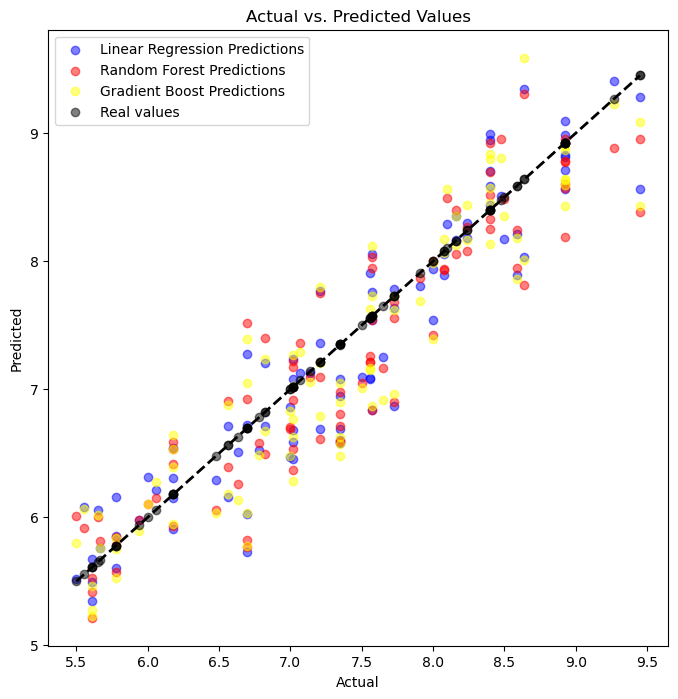

In [77]:
# Scatter plot pro všechny predikce
plt.figure(figsize=(8, 8))

plt.scatter(Ytest_p, YpredLR_p, alpha=0.5, color='blue', label='Linear Regression Predictions')
#plt.scatter(Ytest_p, YpredTR_p, alpha=0.5, color='green', label='Decision Tree Predictions')
plt.scatter(Ytest_p, YpredRF_p, alpha=0.5, color='red', label='Random Forest Predictions')
plt.scatter(Ytest_p, YpredGR_p, alpha=0.5, color='yellow', label='Gradient Boost Predictions')
plt.scatter(Ytest_p, Ytest_p, alpha=0.5, color='black', label = 'Real values')

plt.plot([Ytest_p.min(), Ytest_p.max()], [Ytest_p.min(), Ytest_p.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [78]:
#Výpis MAE
print("MAE všech modelů (nižší = lepší) \n")
print("Linear Regressor MAE: \n" + str(mean_absolute_error(Ytest_p, YpredLR_p)) + "\n")
print("Decision Tree Regressor MAE: \n" + str(mean_absolute_error(Ytest_p, YpredTR_p)) + "\n")
print("Random Forest Regressor MAE: \n" + str(mean_absolute_error(Ytest_p, YpredRF_p)) + "\n")
print("Gradient Boost Regressor MAE: \n" + str(mean_absolute_error(Ytest_p, YpredGR_p)) + "\n")

MAE všech modelů (nižší = lepší) 

Linear Regressor MAE: 
0.3007923705153323

Decision Tree Regressor MAE: 
0.4452011494252874

Random Forest Regressor MAE: 
0.3462210536398467

Gradient Boost Regressor MAE: 
0.3412561973805786



In [79]:
#Výpis MSE
print("MSE všech modelů (nižší = lepší) \n")
print("Linear Regressor MSE: \n" + str(mean_squared_error(Ytest_p, YpredLR_p)) + "\n")
print("Decision Tree Regressor MSE: \n" + str(mean_squared_error(Ytest_p, YpredTR_p)) + "\n")
print("Random Forest Regressor MSE: \n" + str(mean_squared_error(Ytest_p, YpredRF_p)) + "\n")
print("Gradient Boost Regressor MSE: \n" + str(mean_squared_error(Ytest_p, YpredGR_p)) + "\n")

MSE všech modelů (nižší = lepší) 

Linear Regressor MSE: 
0.14756463403789344

Decision Tree Regressor MSE: 
0.36584489942528725

Random Forest Regressor MSE: 
0.18122604444281687

Gradient Boost Regressor MSE: 
0.17888242567438742



In [80]:
#Výpis R2 score
print("R2 score všech modelů (bližší k 1 = lepší) \n")
print("Linear Regressor R2: \n" + str(r2_score(Ytest_p, YpredLR_p)) + "\n")
print("Decision Tree Regressor R2: \n" + str(r2_score(Ytest_p, YpredTR_p)) + "\n")
print("Random Forest Regressor R2: \n" + str(r2_score(Ytest_p, YpredRF_p)) + "\n")
print("Gradient Boost Regressor R2: \n" + str(r2_score(Ytest_p, YpredGR_p)) + "\n")

R2 score všech modelů (bližší k 1 = lepší) 

Linear Regressor R2: 
0.8638269072367313

Decision Tree Regressor R2: 
0.6623972149477537

Random Forest Regressor R2: 
0.8327640554125265

Gradient Boost Regressor R2: 
0.8349267539346746



In [39]:
#Výpis MAPE
print("MAPE všech modelů (nižší = lepší) \n")
print("Linear Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_p, YpredLR_p)) + "\n")
print("Decision Tree Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_p, YpredTR_p)) + "\n")
print("Random Forest Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_p, YpredRF_p)) + "\n")
print("Gradient Boost Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_p, YpredGR_p)) + "\n")

MAPE všech modelů (nižší = lepší) 

Linear Regressor MAPE: 
0.0410745563965584

Decision Tree Regressor MAPE: 
0.05976374202055205

Random Forest Regressor MAPE: 
0.047184371941097536

Gradient Boost Regressor MAPE: 
0.04661411165666364



In [40]:
#######################################################
#                                                     #
#                   PREDIKCE VÝKONU                   #
#               (Upravene hyperparametry)             #
#                                                     #
#######################################################

#Zatím není

In [41]:
#from sklearn.model_selection import GridSearchCV

In [42]:
#######################################################
#                                                     #
#                 PREDIKCE KVALITY                    #
#              (Výchozí hyperparametry)               #
#                                                     #
#######################################################

In [84]:
# Úprava dataframu df_quality

#Opětovný import kvůli debugování
df_quality = pd.read_csv('kvalita.csv')

# Odebrání sloupce s ID smeny
df_quality = df_quality.drop('id_smeny', axis=1)

# Enkódování typu směny ranní = 1, odpolední = 0
df_quality['typ_smeny'] = df_quality['typ_smeny'].map({'ranni': 1, 'odpoledni': 0})

df_quality['skutecna_kvalita'] = df_quality['skutecna_kvalita'] * 100

# Enkódování operátora a typu údržby
df_enc_quality = pd.get_dummies(df_quality, columns=['operator_zam_cislo'])

# Ukázka enkódovaných dat
df_enc_quality

,planovana_delka_smeny(min),typ_smeny,planovany_pocet_serizeni,pocet_vyrobenych_ks_od_vymeny_nastroje,naplanovana_vymena_nastroje,index_složitosti_vyrobku_na_smenu,planovana_kvalita,skutecna_kvalita,operator_zam_cislo_661,operator_zam_cislo_688,operator_zam_cislo_736,operator_zam_cislo_968
0,480,1,1,109,0,13,100,100.0,False,False,True,False
1,480,0,3,157,0,35,100,98.0,False,False,False,True
2,480,1,1,215,0,19,100,100.0,False,False,True,False
3,480,0,1,266,0,13,100,98.0,False,False,False,True
4,480,1,1,348,0,18,100,100.0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
427,480,0,1,4978,0,19,100,100.0,False,False,False,True
428,480,1,2,5026,0,28,100,98.0,False,False,True,False
429,480,0,1,5098,0,13,100,99.0,False,False,False,True
430,480,1,1,5147,0,17,100,98.0,True,False,False,False


In [ ]:
#Rozdělení (SPLIT) na vstupní a výstupní data (X, y)
X_a = df_enc_availability.drop(df_enc_availability.columns[7], axis=1)  # Drop pro 8. sloupec a vse ostatni do X
y_a = df_enc_availability.iloc[:,7:8]  # Drop pro vse krom 8. sloupce a ten do y

In [ ]:
# Ukázka X datasetu (features)
#X_a

In [ ]:
# Ukázka y datasetu (target)
#y_p

In [ ]:
#Rozdělení (SPLIT) na trénovací a testovací data (Aktuálně 80 % dat trénink a 20 % dat test)
Xtrain_p, Xtest_p, Ytrain_p, Ytest_p = train_test_split(X_p,y_p, test_size = 0.20, random_state = 1)

In [ ]:
#Vytvoření instancí s výchozími hyperparametry
modelLR_p = LinearRegression()
modelTR_p = DecisionTreeRegressor()
modelRF_p = RandomForestRegressor(random_state=1)
modelGR_p = GradientBoostingRegressor()

In [ ]:
#Trénink modelů
modelLR_p.fit(Xtrain_p, Ytrain_p)
modelTR_p.fit(Xtrain_p, Ytrain_p)
modelRF_p.fit(Xtrain_p, np.array(Ytrain_p).ravel())
modelGR_p.fit(Xtrain_p, np.array(Ytrain_p).ravel())

In [ ]:
#Vytvoření predikcí jednotlivými algoritmy
YpredLR_p = modelLR_p.predict(Xtest_p)
YpredTR_p = modelTR_p.predict(Xtest_p)
YpredRF_p = modelRF_p.predict(Xtest_p)
YpredGR_p = modelGR_p.predict(Xtest_p)

In [ ]:
# Scatter plot pro všechny predikce
plt.figure(figsize=(8, 8))

plt.scatter(Ytest_p, YpredLR_p, alpha=0.5, color='blue', label='Linear Regression Predictions')
#plt.scatter(Ytest_p, YpredTR_p, alpha=0.5, color='green', label='Decision Tree Predictions')
plt.scatter(Ytest_p, YpredRF_p, alpha=0.5, color='red', label='Random Forest Predictions')
plt.scatter(Ytest_p, YpredGR_p, alpha=0.5, color='yellow', label='Gradient Boost Predictions')
plt.scatter(Ytest_p, Ytest_p, alpha=0.5, color='black', label = 'Real values')

plt.plot([Ytest_p.min(), Ytest_p.max()], [Ytest_p.min(), Ytest_p.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [ ]:
#Výpis MAE
print("MAE všech modelů (nižší = lepší) \n")
print("Linear Regressor MAE: \n" + str(mean_absolute_error(Ytest_p, YpredLR_p)) + "\n")
print("Decision Tree Regressor MAE: \n" + str(mean_absolute_error(Ytest_p, YpredTR_p)) + "\n")
print("Random Forest Regressor MAE: \n" + str(mean_absolute_error(Ytest_p, YpredRF_p)) + "\n")
print("Gradient Boost Regressor MAE: \n" + str(mean_absolute_error(Ytest_p, YpredGR_p)) + "\n")

In [ ]:
#Výpis MSE
print("MSE všech modelů (nižší = lepší) \n")
print("Linear Regressor MSE: \n" + str(mean_squared_error(Ytest_p, YpredLR_p)) + "\n")
print("Decision Tree Regressor MSE: \n" + str(mean_squared_error(Ytest_p, YpredTR_p)) + "\n")
print("Random Forest Regressor MSE: \n" + str(mean_squared_error(Ytest_p, YpredRF_p)) + "\n")
print("Gradient Boost Regressor MSE: \n" + str(mean_squared_error(Ytest_p, YpredGR_p)) + "\n")

In [ ]:
#Výpis R2 score
print("R2 score všech modelů (bližší k 1 = lepší) \n")
print("Linear Regressor R2: \n" + str(r2_score(Ytest_p, YpredLR_p)) + "\n")
print("Decision Tree Regressor R2: \n" + str(r2_score(Ytest_p, YpredTR_p)) + "\n")
print("Random Forest Regressor R2: \n" + str(r2_score(Ytest_p, YpredRF_p)) + "\n")
print("Gradient Boost Regressor R2: \n" + str(r2_score(Ytest_p, YpredGR_p)) + "\n")

In [ ]:
#Výpis MAPE
print("MAPE všech modelů (nižší = lepší) \n")
print("Linear Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_p, YpredLR_p)) + "\n")
print("Decision Tree Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_p, YpredTR_p)) + "\n")
print("Random Forest Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_p, YpredRF_p)) + "\n")
print("Gradient Boost Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_p, YpredGR_p)) + "\n")